In [4]:
import os
# sys.path.append(
#     r'/content/drive/MyDrive/Colab Notebooks/binance-master/rsibot/tactic')
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open 'ta-lib-0.4.0-src.tar.gz'


FileNotFoundError: [WinError 2] Den angivne fil blev ikke fundet: 'ta-lib'

In [2]:
from identify_candlestick import recognize_candlestick
from keras.layers import Dropout
from  tensorflow.keras import models
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import sys
import os
import talib
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
# import yfinance as yf
import seaborn as sns
from datetime import datetime
from os import listdir
import random
random.seed(42)
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'talib'

# Training Regression Neural Network


nr. 0/1
Epoch 1/30
76/76 [==============================] - 1s 7ms/step - loss: 0.0733 - accuracy: 2.0938e-04 - mean_absolute_error: 0.0733 - val_loss: 0.0194 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0194
Epoch 2/30
76/76 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 3.1407e-04 - mean_absolute_error: 0.0105 - val_loss: 0.0118 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0118
Epoch 3/30
76/76 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 3.1407e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0092 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0092
Epoch 4/30
76/76 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 3.1407e-04 - mean_absolute_error: 0.0136 - val_loss: 0.0093 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0093
Epoch 5/30
76/76 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 3.1407e-04 - mean_absolute_error: 0.0086 - val_loss: 

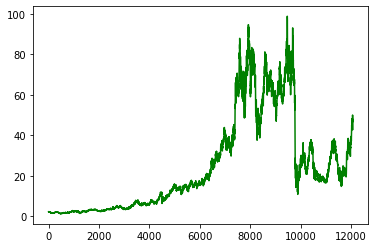

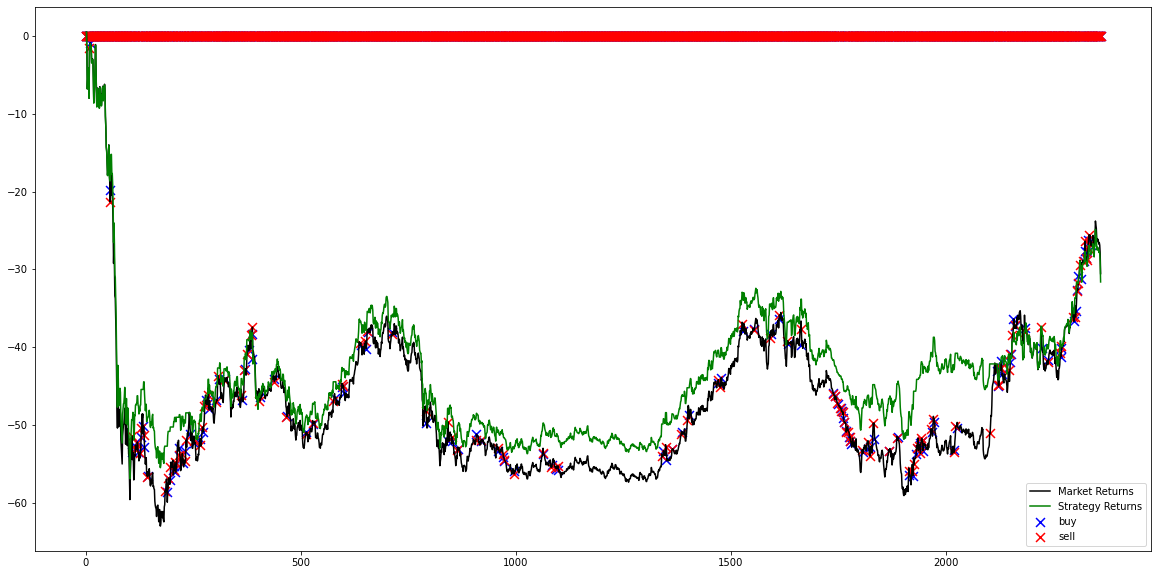

total market return: -30.54099999999996
total strategy return: -31.615999999999957
total antal køb: 128
total antal valgte dage: 2118
total rigtige dage: 1038
total antal dage: 2361


In [35]:

path = r"../../data/Stocks/"

files = listdir(path)
for indx, file in enumerate(files[0:1]):
    print("nr. "+str(indx) +"/"+ str(len(files[0:1])))
    dataset = pd.DataFrame()
    dataset = pd.read_csv(path + "aa.us.txt")
    if len(dataset) < 800 and indx != 0:
        print("Dataset smaller then 800 skipping ...")
        continue

    #casting the data to float
    dataset["Open"] = dataset["Open"].astype(float)
    dataset["High"] = dataset["High"].astype(float)
    dataset["Low"] = dataset["Low"].astype(float)
    dataset["Close"] = dataset["Close"].astype(float)

    #plotting stock closing price
    plt.plot(dataset["Close"],color='g', label='close price')

    # remove unmeaningfull data / Engineering data 
    dataset = dataset.dropna()
    dataset = dataset.reset_index()
    dataset = dataset[['Close', 'High', 'Low', 'Open']]


    dataset['H-L'] = dataset['High'] - dataset['Low']
    dataset['O-C'] = dataset['Close'] - dataset['Open']
    dataset['3day MA'] = dataset['Close'].shift(1).rolling(window=3).mean()
    dataset['10day MA'] = dataset['Close'].shift(1).rolling(window=10).mean()
    dataset['30day MA'] = dataset['Close'].shift(1).rolling(window=30).mean()
    dataset['60day MA'] = dataset['Close'].shift(1).rolling(window=60).mean()
    dataset['Std_dev'] = dataset['Close'].rolling(5).std()
    dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod=9)
    dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)
    dataset['Cmo'] = talib.CMO(dataset['Close'].values,  timeperiod=4)
    dataset["ADX"] = talib.ADX(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["ADXR"] = talib.ADXR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["APO"] = talib.APO(dataset['Close'].values)
    dataset["BOP"] = talib.BOP(dataset['Open'].values, dataset['High'].values,dataset['Low'].values, dataset['Close'].values)
    dataset["CCI"] = talib.CCI(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["CMO"] = talib.CMO(dataset['Close'].values)
    dataset["DX"] = talib.DX(dataset['High'].values,dataset['Low'].values, dataset['Close'].values)
    dataset["MFI"] = talib.MFI(dataset['Open'].values, dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["MINUS_DI"] = talib.MINUS_DI(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["MOM"] = talib.MOM(dataset['Close'].values)
    dataset["PLUS_DI"] = talib.PLUS_DI(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["PPO"] = talib.PPO(dataset['Close'].values)
    dataset["ROCP"] = talib.ROCP(dataset['Close'].values)
    dataset["ROCR"] = talib.ROCR(dataset['Close'].values)
    dataset["TRIX"] = talib.TRIX(dataset['Close'].values)
    dataset["ULTOSC"] = talib.ULTOSC(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["TSF"] = talib.TSF(dataset['Close'].values, timeperiod=14)
    dataset["STDDEV"] = talib.STDDEV(dataset['Close'].values, timeperiod=5, nbdev=1)
    dataset = recognize_candlestick(dataset)
    dataset = dataset.drop(columns=["candlestick_match_count"])
    dataset = dataset.drop(columns=["candlestick_pattern"])
    dataset['returns'] = dataset["Close"].pct_change()
    dataset["log_returns"] = np.log(1 + dataset["returns"])
    dataset.head()

    #Cleaning
    dataset.dropna(inplace=True)
    X = dataset.drop(columns=["returns"]).values

    #Scaling
    scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
    x_scaled = scaler.transform(X)


    #Shaping data
    y = [x[0] for x in x_scaled]

    split = int(len(x_scaled) *0.8)

    x_train = x_scaled[:split]
    x_test = x_scaled[split: len(x_scaled)]
    y_train = y[:split]
    y_test = y[split : len(y)]

    n = 35
    xtrain = []
    ytrain = []
    xtest = []
    ytest = []
    for i in range(n, len(x_train)-1):
        xtrain.append(x_train[i, : x_train.shape[1]])     # i = 35 , n = 35 , x_train.shape[1] = 89
        ytrain.append(y_train[i+1]) # i = 35
    for i in range(n, len(x_test)-1):
        xtest.append(x_test[i, : x_test.shape[1]])
        ytest.append(y_test[i+1])


    xtrain, ytrain = (np.array(xtrain), np.array(ytrain))
    xtrain = np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1]))

    xtest, ytest = (np.array(xtest), np.array(ytest))
    xtest = np.reshape(xtest,(xtest.shape[0], xtest.shape[1]))

    #Creating model
    if indx == 0:
        mod=Sequential()
        mod.add(Dense(32, kernel_initializer='normal',input_dim = xtrain.shape[1], activation='relu'))
        mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
        mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
        mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
        mod.add(Dense(1, kernel_initializer='normal',activation='linear'))

        mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])

    mod.fit(
    xtrain, ytrain, epochs=30, validation_data=(xtest,ytest), batch_size=126, verbose=1
    )

    #Predicting
    trainpredict = mod.predict(xtrain)
    testpredict = mod.predict(xtest)

    #Rescaling data
    z1 = np.zeros(trainpredict.shape)
    z2 = np.zeros(testpredict.shape)
    zero = len(X[0])-1
    print(zero)
    for i in range(zero):
        trainpredict = np.c_[trainpredict, z1]
        testpredict = np.c_[testpredict, z2]

    trainpredict = scaler.inverse_transform(trainpredict)
    trainpredict = [x[0] for x in trainpredict]

    testpredict = scaler.inverse_transform(testpredict)
    testpredict = [x[0] for x in testpredict]

    z3 = np.zeros(ytest.shape)
    for i in range(zero):
        ytest = np.c_[ytest, z3]
    ytestscaled = scaler.inverse_transform(ytest)
    ytestscaled = [x[0] for x in ytestscaled]

    #Assesing model
    df = pd.DataFrame()
    df["preds"] = testpredict
    df["price_tomorrow"] = ytestscaled
    df["price_today"] = ytestscaled
    df["price_today"] = df["price_today"].shift(1)
    df = df.dropna()

    df["change"] = df.apply(lambda x: x["preds"] - x["price_today"] ,axis=1)
    df["trigger"] = np.where(df["change"]>0.0,1,0)
    df["good_days"] = np.where(df["price_tomorrow"]>df["price_today"],1,0)

    pred = df["trigger"] == 1
    y_pred = np.array(pred)

    df["Close"] = df["price_today"]
    df['y_pred'] = y_pred
    trade_dataset = df.dropna()

    #Preparing output for validation
    trade_dataset['Tomorrows Returns'] = 0.
    trade_dataset['Tomorrows Returns'] = trade_dataset['Close'] - \
      trade_dataset['Close'].shift(1)
    trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(
      -1)

    trade_dataset['Strategy Returns'] = 0.
    trade_dataset['Strategy Returns'] = np.where(
      trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], 0)

    trade_dataset['Cumulative Market Returns'] = np.cumsum(
      trade_dataset['Tomorrows Returns'])
    trade_dataset['Cumulative Strategy Returns'] = np.cumsum(
      trade_dataset['Strategy Returns'])
    trade_dataset["buy"] = np.where((trade_dataset['y_pred'] == True) &
                                  (trade_dataset['y_pred'].shift(1) == False), 1, 0)

    trade_dataset["buy_spot"] = np.where(
      (trade_dataset["buy"] == 1), trade_dataset["Cumulative Market Returns"], 0)

    trade_dataset["sell"] = np.where((trade_dataset['y_pred'] == False) &
                                    (trade_dataset['y_pred'].shift(1) == True), 1, 0)

    trade_dataset["sell_spot"] = np.where(
      (trade_dataset["sell"] == 1), trade_dataset["Cumulative Market Returns"], 0)
    plt.style.use('seaborn-bright')
    plt.figure(figsize=(20, 10))
    plt.plot(trade_dataset['Cumulative Market Returns'],
            color='black', label='Market Returns')
    plt.plot(trade_dataset['Cumulative Strategy Returns'],
            color='g', label='Strategy Returns')

    plt.scatter(range(len(trade_dataset["buy_spot"])), trade_dataset["buy_spot"], marker="x",s=80, label="buy", color='b')
    plt.scatter(range(len(trade_dataset["sell_spot"])), trade_dataset["sell_spot"],marker="x",s=80, label="sell", color='r')
    plt.legend()
    plt.show()

    print("total market return: " +
        str(trade_dataset['Cumulative Market Returns'].iloc[-2]))
    print("total strategy return: " +
        str(trade_dataset['Cumulative Strategy Returns'].iloc[-2]))
    print("total antal køb: "+str(sum(trade_dataset["buy"])))
    print("total antal valgte dage: "+str(sum(trade_dataset["y_pred"])))
    print("total rigtige dage: " + str(len(trade_dataset[(trade_dataset["y_pred"] == True) & (trade_dataset["Tomorrows Returns"] > 0)])))
    print("total antal dage: "+str(len(trade_dataset)))

# Training LSTM


nr. 0/2
Epoch 1/18
76/76 [==============================] - 54s 716ms/step - loss: 0.0151 - val_loss: 0.0015
Epoch 2/18
76/76 [==============================] - 52s 680ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/18
76/76 [==============================] - 52s 690ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/18
76/76 [==============================] - 53s 696ms/step - loss: 0.0012 - val_loss: 7.5728e-04
Epoch 5/18
76/76 [==============================] - 53s 697ms/step - loss: 0.0010 - val_loss: 9.2586e-04
Epoch 6/18
76/76 [==============================] - 56s 739ms/step - loss: 9.6652e-04 - val_loss: 8.4446e-04
Epoch 7/18
76/76 [==============================] - 67s 877ms/step - loss: 9.6432e-04 - val_loss: 8.8070e-04
Epoch 8/18
76/76 [==============================] - 67s 879ms/step - loss: 9.6092e-04 - val_loss: 4.9435e-04
Epoch 9/18
76/76 [==============================] - 60s 784ms/step - loss: 9.7497e-04 - val_loss: 5.2795e-04
Epoch 10/18
76/76 [========================

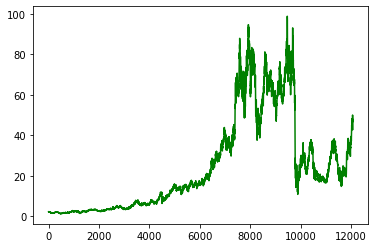

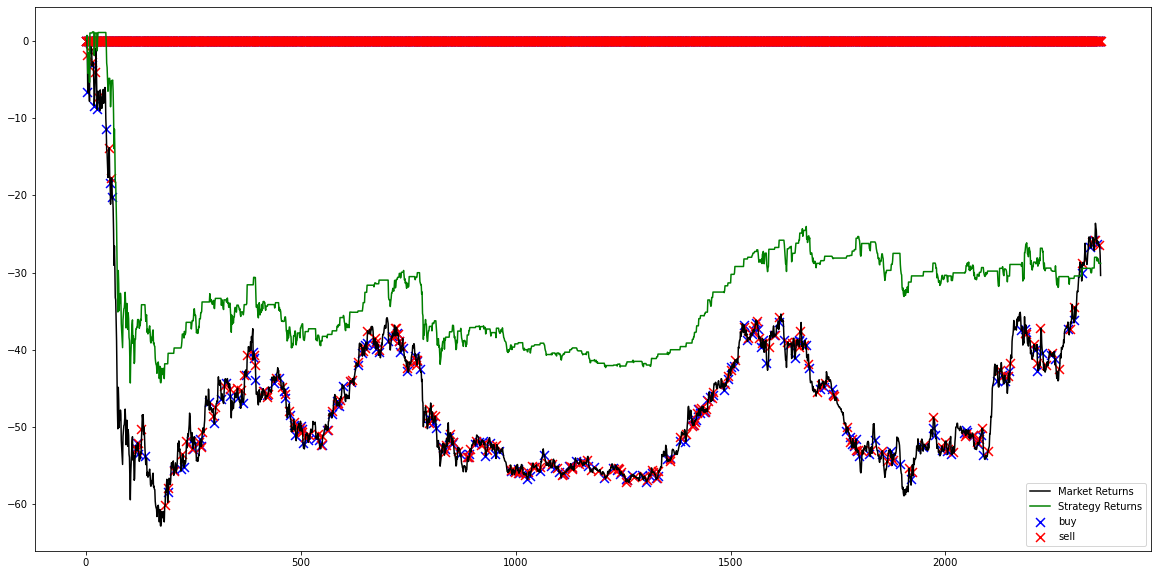

total market return: -30.373999999999945
total strategy return: -28.81200000000003
total antal køb: 217
total antal valgte dage: 990
total rigtige dage: 495
total antal dage: 2362
nr. 1/2
Epoch 1/18
39/76 [==============>...............] - ETA: 26s - loss: 6.5008e-04

KeyboardInterrupt: 

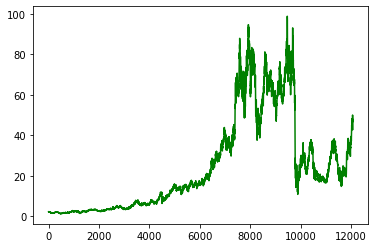

In [24]:
path = "../../data/Stocks/"

files = listdir(path)
for indx, file in enumerate(files[30:32]):
    print("nr. "+str(indx) +"/"+ str(len(files[30:32])))
    dataset = pd.DataFrame()
    dataset = pd.read_csv(path + "aa.us.txt")
    if len(dataset) < 800 and indx != 0:
        print("Dataset smaller then 800 skipping ...")
        continue

    #casting the data to float
    dataset["Open"] = dataset["Open"].astype(float)
    dataset["High"] = dataset["High"].astype(float)
    dataset["Low"] = dataset["Low"].astype(float)
    dataset["Close"] = dataset["Close"].astype(float)

    #plotting stock closing price
    plt.plot(dataset["Close"],color='g', label='close price')

    # remove unmeaningfull data / Engineering data 
    dataset = dataset.dropna()
    dataset = dataset.reset_index()
    dataset = dataset[['Close', 'High', 'Low', 'Open']]

    dataset['H-L'] = dataset['High'] - dataset['Low']
    dataset['O-C'] = dataset['Close'] - dataset['Open']
    dataset['3day MA'] = dataset['Close'].shift(1).rolling(window=3).mean()
    dataset['10day MA'] = dataset['Close'].shift(1).rolling(window=10).mean()
    dataset['30day MA'] = dataset['Close'].shift(1).rolling(window=30).mean()
    dataset['60day MA'] = dataset['Close'].shift(1).rolling(window=60).mean()
    dataset['Std_dev'] = dataset['Close'].rolling(5).std()
    dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod=9)
    dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)
    dataset['Cmo'] = talib.CMO(dataset['Close'].values,  timeperiod=4)
    dataset["ADX"] = talib.ADX(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["ADXR"] = talib.ADXR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["APO"] = talib.APO(dataset['Close'].values)
    dataset["BOP"] = talib.BOP(dataset['Open'].values, dataset['High'].values,dataset['Low'].values, dataset['Close'].values)
    dataset["CCI"] = talib.CCI(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["CMO"] = talib.CMO(dataset['Close'].values)
    dataset["DX"] = talib.DX(dataset['High'].values,dataset['Low'].values, dataset['Close'].values)
    dataset["MFI"] = talib.MFI(dataset['Open'].values, dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["MINUS_DI"] = talib.MINUS_DI(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["MOM"] = talib.MOM(dataset['Close'].values)
    dataset["PLUS_DI"] = talib.PLUS_DI(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["PPO"] = talib.PPO(dataset['Close'].values)
    dataset["ROCP"] = talib.ROCP(dataset['Close'].values)
    dataset["ROCR"] = talib.ROCR(dataset['Close'].values)
    dataset["TRIX"] = talib.TRIX(dataset['Close'].values)
    dataset["ULTOSC"] = talib.ULTOSC(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["TSF"] = talib.TSF(dataset['Close'].values, timeperiod=14)
    dataset["STDDEV"] = talib.STDDEV(dataset['Close'].values, timeperiod=5, nbdev=1)
    dataset = recognize_candlestick(dataset)
    dataset = dataset.drop(columns=["candlestick_match_count"])
    dataset = dataset.drop(columns=["candlestick_pattern"])
    dataset['returns'] = dataset["Close"].pct_change()
    dataset["log_returns"] = np.log(1 + dataset["returns"])
    dataset.head()

    #Cleaning
    dataset.dropna(inplace=True)
    X = dataset.drop(columns=["returns"]).values

    #Scaling
    scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
    x_scaled = scaler.transform(X)


    #Shaping data
    y = [x[0] for x in x_scaled]

    split = int(len(x_scaled) *0.8)

    x_train = x_scaled[:split]
    x_test = x_scaled[split: len(x_scaled)]
    y_train = y[:split]
    y_test = y[split : len(y)]

    n = 35
    xtrain = []
    ytrain = []
    xtest = []
    ytest = []
    for i in range(n, len(x_train)):
        xtrain.append(x_train[i-n : i, : x_train.shape[1]])     # i = 35 , n = 35 , x_train.shape[1] = 89
        ytrain.append(y_train[i]) # i = 35
    for i in range(n, len(x_test)):
        xtest.append(x_test[i-n : i, : x_test.shape[1]])
        ytest.append(y_test[i])


    xtrain, ytrain = (np.array(xtrain), np.array(ytrain))
    xtrain = np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1], xtrain.shape[2]))

    xtest, ytest = (np.array(xtest), np.array(ytest))
    xtest = np.reshape(xtest,(xtest.shape[0], xtest.shape[1], xtest.shape[2]))

    #Creating model
    if indx == 0:
        model = Sequential()
        model.add(LSTM(200, return_sequences = True, input_shape = (xtrain.shape[1], xtrain.shape[2])))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100, return_sequences = True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100, return_sequences = True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100, return_sequences = False))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    #Training model
    model.fit(
      xtrain, ytrain, epochs=18, validation_data=(xtest,ytest), batch_size=126, verbose=1
    )
    #Predicting
    trainpredict = model.predict(xtrain)
    testpredict = model.predict(xtest)

    #Rescaling data
    z1 = np.zeros(trainpredict.shape)
    z2 = np.zeros(testpredict.shape)
    zero = len(X[0])-1
    print(zero)
    for i in range(zero):
        trainpredict = np.c_[trainpredict, z1]
        testpredict = np.c_[testpredict, z2]

    trainpredict = scaler.inverse_transform(trainpredict)
    trainpredict = [x[0] for x in trainpredict]

    testpredict = scaler.inverse_transform(testpredict)
    testpredict = [x[0] for x in testpredict]

    z3 = np.zeros(ytest.shape)
    for i in range(zero):
        ytest = np.c_[ytest, z3]
        
    ytestscaled = scaler.inverse_transform(ytest)
    ytestscaled = [x[0] for x in ytestscaled]

    #Assesing model
    df = pd.DataFrame()
    df["preds"] = testpredict
    df["price_tomorrow"] = ytestscaled
    df["price_today"] = ytestscaled
    df["price_today"] = df["price_today"].shift(1)
    df = df.dropna()

    df["change"] = df.apply(lambda x: x["preds"] - x["price_today"] ,axis=1)
    df["trigger"] = np.where(df["change"]>0.0,1,0)
    df["good_days"] = np.where(df["price_tomorrow"]>df["price_today"],1,0)

    pred = df["trigger"] == 1
    y_pred = np.array(pred)

    df["Close"] = df["price_today"]
    df['y_pred'] = y_pred
    trade_dataset = df.dropna()

    #Preparing output for validation
    trade_dataset['Tomorrows Returns'] = 0.
    trade_dataset['Tomorrows Returns'] = trade_dataset['Close'] - \
      trade_dataset['Close'].shift(1)
    trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(
      -1)

    trade_dataset['Strategy Returns'] = 0.
    trade_dataset['Strategy Returns'] = np.where(
      trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], 0)

    trade_dataset['Cumulative Market Returns'] = np.cumsum(
      trade_dataset['Tomorrows Returns'])
    trade_dataset['Cumulative Strategy Returns'] = np.cumsum(
      trade_dataset['Strategy Returns'])
    trade_dataset["buy"] = np.where((trade_dataset['y_pred'] == True) &
                                  (trade_dataset['y_pred'].shift(1) == False), 1, 0)

    trade_dataset["buy_spot"] = np.where(
      (trade_dataset["buy"] == 1), trade_dataset["Cumulative Market Returns"], 0)

    trade_dataset["sell"] = np.where((trade_dataset['y_pred'] == False) &
                                    (trade_dataset['y_pred'].shift(1) == True), 1, 0)

    trade_dataset["sell_spot"] = np.where(
      (trade_dataset["sell"] == 1), trade_dataset["Cumulative Market Returns"], 0)
    plt.style.use('seaborn-bright')
    plt.figure(figsize=(20, 10))
    plt.plot(trade_dataset['Cumulative Market Returns'],
            color='black', label='Market Returns')
    plt.plot(trade_dataset['Cumulative Strategy Returns'],
            color='g', label='Strategy Returns')

    plt.scatter(range(len(trade_dataset["buy_spot"])), trade_dataset["buy_spot"], marker="x",s=80, label="buy", color='b')
    plt.scatter(range(len(trade_dataset["sell_spot"])), trade_dataset["sell_spot"],marker="x",s=80, label="sell", color='r')
    plt.legend()
    plt.show()

    print("total market return: " +
        str(trade_dataset['Cumulative Market Returns'].iloc[-2]))
    print("total strategy return: " +
        str(trade_dataset['Cumulative Strategy Returns'].iloc[-2]))
    print("total antal køb: "+str(sum(trade_dataset["buy"])))
    print("total antal valgte dage: "+str(sum(trade_dataset["y_pred"])))
    print("total rigtige dage: " + str(len(trade_dataset[(trade_dataset["y_pred"] == True) & (trade_dataset["Tomorrows Returns"] > 0)])))
    print("total antal dage: "+str(len(trade_dataset)))

# model.save('./models/LSTM_v7') 

## nr 6 er trænet på :500
men ikke finutunet til crypto 


# predict with model


In [25]:
model = models.load_model("../../models/models/LSTM_v6") 

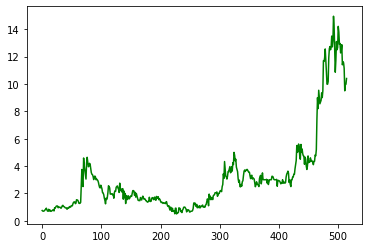

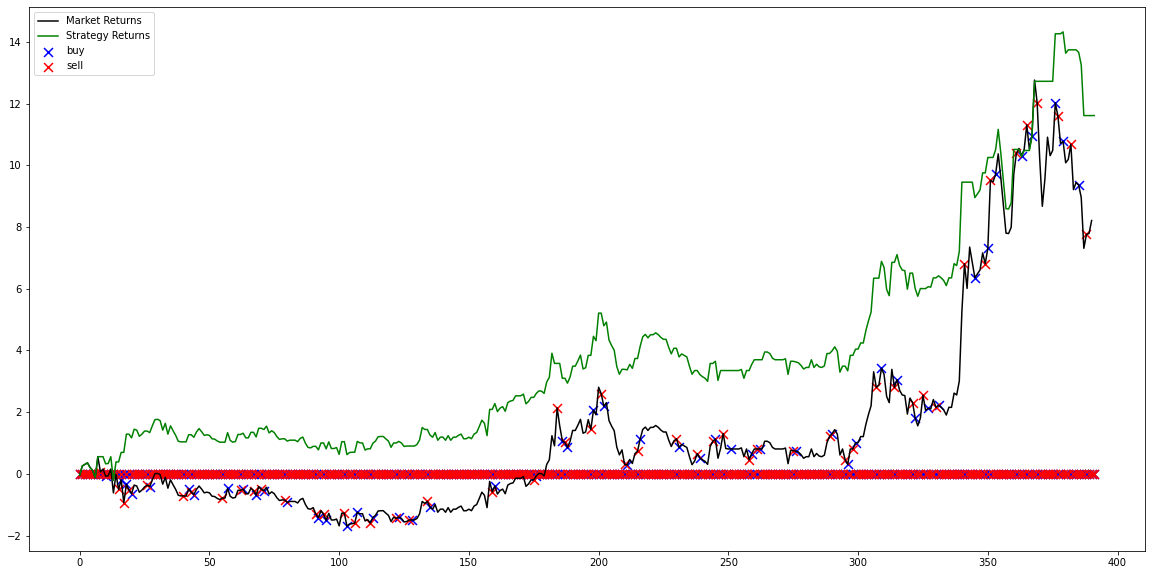

total market return: 8.210000000000003
total strategy return: 11.609599999999999
total antal køb: 51
total antal valgte dage: 314
total rigtige dage: 154
total antal dage: 392


In [34]:

path = "../../data/Stocks/"
# files = listdir(r"./data/other stocks/archive (3).zip (Unzipped Files)/Stocks")
files = listdir(path)
for indx, file in enumerate(files[30:31]):
    dataset = pd.DataFrame()
    dataset = pd.read_csv(path + file)

    dataset["Open"] = dataset["Open"].astype(float)
    dataset["High"] = dataset["High"].astype(float)
    dataset["Low"] = dataset["Low"].astype(float)
    dataset["Close"] = dataset["Close"].astype(float)

    plt.plot(dataset["Close"],color='g', label='close price')

    dataset = dataset.reset_index()#[:600]
    dataset = dataset[['Close', 'Open', 'High', 'Low']]

    dataset = dataset.dropna()


    dataset['H-L'] = dataset['High'] - dataset['Low']
    dataset['O-C'] = dataset['Close'] - dataset['Open']
    dataset['3day MA'] = dataset['Close'].shift(1).rolling(window=3).mean()
    dataset['10day MA'] = dataset['Close'].shift(1).rolling(window=10).mean()
    dataset['30day MA'] = dataset['Close'].shift(1).rolling(window=30).mean()
    dataset['60day MA'] = dataset['Close'].shift(1).rolling(window=60).mean()
    dataset['Std_dev'] = dataset['Close'].rolling(5).std()
    dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod=9)
    dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

    # Ekstra
    dataset['Cmo'] = talib.CMO(dataset['Close'].values,  timeperiod=4)
    dataset["ADX"] = talib.ADX(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["ADXR"] = talib.ADXR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["APO"] = talib.APO(dataset['Close'].values)
    dataset["BOP"] = talib.BOP(dataset['Open'].values, dataset['High'].values,dataset['Low'].values, dataset['Close'].values)
    dataset["CCI"] = talib.CCI(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["CMO"] = talib.CMO(dataset['Close'].values)
    dataset["DX"] = talib.DX(dataset['High'].values,dataset['Low'].values, dataset['Close'].values)
    dataset["MFI"] = talib.MFI(dataset['Open'].values, dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["MINUS_DI"] = talib.MINUS_DI(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["MOM"] = talib.MOM(dataset['Close'].values)
    dataset["PLUS_DI"] = talib.PLUS_DI(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["PPO"] = talib.PPO(dataset['Close'].values)
    dataset["ROCP"] = talib.ROCP(dataset['Close'].values)
    dataset["ROCR"] = talib.ROCR(dataset['Close'].values)
    dataset["TRIX"] = talib.TRIX(dataset['Close'].values)
    dataset["ULTOSC"] = talib.ULTOSC(dataset['High'].values, dataset['Low'].values, dataset['Close'].values)
    dataset["TSF"] = talib.TSF(dataset['Close'].values, timeperiod=14)
    dataset["STDDEV"] = talib.STDDEV(dataset['Close'].values, timeperiod=5, nbdev=1)

    dataset = recognize_candlestick(dataset)
    dataset = dataset.drop(columns=["candlestick_match_count"])
    dataset = dataset.drop(columns=["candlestick_pattern"])
    dataset

    dataset['returns'] = dataset["Close"].pct_change()
    dataset["log_returns"] = np.log(1 + dataset["returns"])
    # dataset.head()

    dataset.dropna(inplace=True)
    # X = dataset[["Close", "log_returns"]].values
    X = dataset.drop(columns=["returns"]).values

    scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
    x_scaled = scaler.transform(X)

    n = 35
    x = []

    for i in range(n, len(x_scaled)):
        x.append(x_scaled[i-n : i, : x_scaled.shape[1]])


    x= np.array(x)
    x = np.reshape(x, (x.shape[0],x.shape[1], x.shape[2]))

    predict = model.predict(x)


    z1 = np.zeros(predict.shape)
    zero = len(X[0])-1

    for i in range(zero):
        predict = np.c_[predict, z1]

    predict = scaler.inverse_transform(predict)
    predict = [x[0] for x in predict]

    # z3 = np.zeros(ytest.shape)
    # for i in range(zero):
    #   ytest = np.c_[ytest, z3]
    # ytestscaled = scaler.inverse_transform(ytest)
    # ytestscaled = [x[0] for x in ytestscaled]

    df = dataset[["Close"]][35:]
    df["preds"] = predict
    # df["price_tomorrow"] = ytestscaled
    # df["price_today"] = ytestscaled
    # df["price_today"] = df["price_today"].shift(1)


    df = df.dropna()
    # df["Close"] = [x[0] for x in X][35:]
    df["change"] = df.apply(lambda x: x["preds"] - x["Close"] ,axis=1)

    df["trigger"] = np.where((df["change"]>0.3) & (df["change"]<2),1,0)
    # df["good_days"] = np.where(df["price_tomorrow"]>df["price_today"],1,0)


    pred = df["trigger"] == 1

    y_pred = np.array(pred)

    df['y_pred'] = y_pred
    # dataset.iloc[(len(dataset) - len(y_pred)):, -1:] = y_pred
    trade_dataset = df.dropna().reset_index()


    trade_dataset['Tomorrows Returns'] = 0.
    trade_dataset['Tomorrows Returns'] = trade_dataset['Close'] - \
      trade_dataset['Close'].shift(1)
    trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(
      -1)

    trade_dataset['Strategy Returns'] = 0.
    trade_dataset['Strategy Returns'] = np.where(
      trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], 0)

    trade_dataset['Cumulative Market Returns'] = np.cumsum(
      trade_dataset['Tomorrows Returns'])
    trade_dataset['Cumulative Strategy Returns'] = np.cumsum(
      trade_dataset['Strategy Returns'])
    trade_dataset["buy"] = np.where((trade_dataset['y_pred'] == True) &
                                  (trade_dataset['y_pred'].shift(1) == False), 1, 0)

    trade_dataset["buy_spot"] = np.where(
      (trade_dataset["buy"] == 1), trade_dataset["Cumulative Market Returns"], 0)

    trade_dataset["sell"] = np.where((trade_dataset['y_pred'] == False) &
                                    (trade_dataset['y_pred'].shift(1) == True), 1, 0)

    trade_dataset["sell_spot"] = np.where(
      (trade_dataset["sell"] == 1), trade_dataset["Cumulative Market Returns"], 0)
    plt.style.use('seaborn-bright')
    plt.figure(figsize=(20, 10))
    plt.plot(trade_dataset['Cumulative Market Returns'],
            color='black', label='Market Returns')
    plt.plot(trade_dataset['Cumulative Strategy Returns'],
            color='g', label='Strategy Returns')

    plt.scatter(range(len(trade_dataset["buy_spot"])), trade_dataset["buy_spot"], marker="x",s=80, label="buy", color='b')
    plt.scatter(range(len(trade_dataset["sell_spot"])), trade_dataset["sell_spot"],marker="x",s=80, label="sell", color='r')
    plt.legend()
    plt.show()

    print("total market return: " +
        str(trade_dataset['Cumulative Market Returns'].iloc[-2]))
    print("total strategy return: " +
        str(trade_dataset['Cumulative Strategy Returns'].iloc[-2]))
    print("total antal køb: "+str(sum(trade_dataset["buy"])))
    print("total antal valgte dage: "+str(sum(trade_dataset["y_pred"])))
    print("total rigtige dage: " + str(len(trade_dataset[(trade_dataset["y_pred"] == True) & (trade_dataset["Tomorrows Returns"] > 0)])))
    print("total antal dage: "+str(len(trade_dataset)))



In [1]:
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
#big_close
fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

NameError: name 'go' is not defined